In [669]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [670]:
def loss_calc(report_mat):
  loss=0
  loss+=report_mat[0][1]*100
  loss+=report_mat[1][0]*500
  return loss


In [671]:
def metric_show(y_test,predictions,model):
  accuracy= metrics.accuracy_score(y_test,predictions)
  precision=metrics.precision_score(y_test,predictions)
  recall=metrics.recall_score(y_test,predictions)
  print(f"Accuracy on {model}: {accuracy}")
  print(f"Precision on {model}: {precision}")
  print(f"Recall on {model}: {recall}")
  print(confusion_matrix(y_test,predictions))
  print("Loss on Regression: ",loss_calc(list(confusion_matrix(y_test,predictions))))

In [672]:
def plot_labels(xlabel,ylabel,title):
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

In [673]:
columns=['ACCT_STATUS','DURATION','CREDIT_HISTORY','PURPOSE','CREDIT_AMT','SAVE_ACCTS/BONDS','EMPLOYMENT_SINCE','INSTALLMENT_RATE','GENDER AND PERSONAL STATE','GURANTORS','PRESENT_RESIDENCE_SINCE','PROPERTY','AGE','INSTALLMENT PLANS','HOUSING','NO._EXISTING_CREDITS','JOB','NO_LIABLE','TELEPHONE','FOREIGN_WORKER','RESPONSE']

In [674]:
len(columns)

21

In [675]:
german_num=pd.read_csv('/content/german.data-numeric',sep='\t',header=None)

In [676]:
german_num.head()

,0
0,1 6 4 12 5 5 3 4 1 67 3 ...
1,2 48 2 60 1 3 2 2 1 22 3 ...
2,4 12 4 21 1 4 3 3 1 49 3 ...
3,1 42 2 79 1 4 3 4 2 45 3 ...
4,1 24 3 49 1 3 3 4 4 53 3 ...


In [677]:
german_cat=pd.read_csv('/content/german.data',sep=' ',header=None)

In [678]:
german_cat.columns=columns

In [679]:
german_cat.head()

,ACCT_STATUS,DURATION,CREDIT_HISTORY,PURPOSE,CREDIT_AMT,SAVE_ACCTS/BONDS,EMPLOYMENT_SINCE,INSTALLMENT_RATE,GENDER AND PERSONAL STATE,GURANTORS,...,PROPERTY,AGE,INSTALLMENT PLANS,HOUSING,NO._EXISTING_CREDITS,JOB,NO_LIABLE,TELEPHONE,FOREIGN_WORKER,RESPONSE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [680]:
german_cat.tail()

,ACCT_STATUS,DURATION,CREDIT_HISTORY,PURPOSE,CREDIT_AMT,SAVE_ACCTS/BONDS,EMPLOYMENT_SINCE,INSTALLMENT_RATE,GENDER AND PERSONAL STATE,GURANTORS,...,PROPERTY,AGE,INSTALLMENT PLANS,HOUSING,NO._EXISTING_CREDITS,JOB,NO_LIABLE,TELEPHONE,FOREIGN_WORKER,RESPONSE
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [681]:
german_cat.shape

(1000, 21)

In [682]:
german_cat.describe()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


######DURATION,CREDIT_AMOUNT AND AGE HAVE HIGH DEVIATIONS! 

In [683]:
german_cat.nunique()

ACCT_STATUS                    4
DURATION                      33
CREDIT_HISTORY                 5
PURPOSE                       10
CREDIT_AMT                   921
SAVE_ACCTS/BONDS               5
EMPLOYMENT_SINCE               5
INSTALLMENT_RATE               4
GENDER AND PERSONAL STATE      4
GURANTORS                      3
PRESENT_RESIDENCE_SINCE        4
PROPERTY                       4
AGE                           53
INSTALLMENT PLANS              3
HOUSING                        3
NO._EXISTING_CREDITS           4
JOB                            4
NO_LIABLE                      2
TELEPHONE                      2
FOREIGN_WORKER                 2
RESPONSE                       2
dtype: int64

In [684]:
german_cat.isnull().sum()

ACCT_STATUS                  0
DURATION                     0
CREDIT_HISTORY               0
PURPOSE                      0
CREDIT_AMT                   0
SAVE_ACCTS/BONDS             0
EMPLOYMENT_SINCE             0
INSTALLMENT_RATE             0
GENDER AND PERSONAL STATE    0
GURANTORS                    0
PRESENT_RESIDENCE_SINCE      0
PROPERTY                     0
AGE                          0
INSTALLMENT PLANS            0
HOUSING                      0
NO._EXISTING_CREDITS         0
JOB                          0
NO_LIABLE                    0
TELEPHONE                    0
FOREIGN_WORKER               0
RESPONSE                     0
dtype: int64

#####NO MISSING VALUES!!!

In [685]:
cat_columns=[columns[0],columns[2],columns[5],columns[6],columns[8],columns[9],columns[11],columns[13],columns[14],columns[16],columns[18],columns[19]]
cat_columns

['ACCT_STATUS',
 'CREDIT_HISTORY',
 'SAVE_ACCTS/BONDS',
 'EMPLOYMENT_SINCE',
 'GENDER AND PERSONAL STATE',
 'GURANTORS',
 'PROPERTY',
 'INSTALLMENT PLANS',
 'HOUSING',
 'JOB',
 'TELEPHONE',
 'FOREIGN_WORKER']

In [686]:
for column in cat_columns:
  german_cat[column+'0']=german_cat[column].str[-1].astype(int)

In [687]:
german_cat

,ACCT_STATUS,DURATION,CREDIT_HISTORY,PURPOSE,CREDIT_AMT,SAVE_ACCTS/BONDS,EMPLOYMENT_SINCE,INSTALLMENT_RATE,GENDER AND PERSONAL STATE,GURANTORS,...,SAVE_ACCTS/BONDS0,EMPLOYMENT_SINCE0,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,5,5,3,1,1,3,2,3,2,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,1,3,2,1,1,3,2,3,1,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,1,4,3,1,1,3,2,2,1,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,1,4,3,3,2,3,3,3,1,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,1,3,3,1,4,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,1,4,2,1,1,3,2,2,1,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,1,3,1,1,2,3,2,4,2,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,1,5,3,1,3,3,2,3,1,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,1,3,3,1,4,3,3,3,2,1


In [688]:
german_cat['PURPOSE0']=german_cat['PURPOSE'].str[-2:].astype(int)

In [689]:
german_cat.drop(['PURPOSE'],axis=1,inplace=True)

In [690]:
german_cat.shape

(1000, 33)

In [691]:
PURPOSE0_COL=german_cat['PURPOSE0'].apply(lambda x: x%40 if x!=10 else x)

In [692]:
german_cat['PURPOSE']=PURPOSE0_COL

In [693]:
german_cat['PURPOSE'].unique()

array([ 3,  6,  2,  0,  1,  9,  4,  5, 10,  8])

In [694]:
german_cat.drop(cat_columns,axis=1,inplace=True)

In [695]:
german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,RESPONSE,ACCT_STATUS0,CREDIT_HISTORY0,...,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE0,PURPOSE
0,6,1169,4,4,67,2,1,1,1,4,...,3,1,1,3,2,3,2,1,43,3
1,48,5951,2,2,22,1,1,2,2,2,...,2,1,1,3,2,3,1,1,43,3
2,12,2096,2,3,49,1,2,1,4,4,...,3,1,1,3,2,2,1,1,46,6
3,42,7882,2,4,45,1,2,1,1,2,...,3,3,2,3,3,3,1,1,42,2
4,24,4870,3,4,53,2,2,2,1,3,...,3,1,4,3,3,3,1,1,40,0


In [696]:
german_cat.drop(['PURPOSE0'],inplace=True,axis=1)

In [697]:
german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,RESPONSE,ACCT_STATUS0,CREDIT_HISTORY0,...,EMPLOYMENT_SINCE0,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE
0,6,1169,4,4,67,2,1,1,1,4,...,5,3,1,1,3,2,3,2,1,3
1,48,5951,2,2,22,1,1,2,2,2,...,3,2,1,1,3,2,3,1,1,3
2,12,2096,2,3,49,1,2,1,4,4,...,4,3,1,1,3,2,2,1,1,6
3,42,7882,2,4,45,1,2,1,1,2,...,4,3,3,2,3,3,3,1,1,2
4,24,4870,3,4,53,2,2,2,1,3,...,3,3,1,4,3,3,3,1,1,0


In [698]:
german_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   DURATION                    1000 non-null   int64
 1   CREDIT_AMT                  1000 non-null   int64
 2   INSTALLMENT_RATE            1000 non-null   int64
 3   PRESENT_RESIDENCE_SINCE     1000 non-null   int64
 4   AGE                         1000 non-null   int64
 5   NO._EXISTING_CREDITS        1000 non-null   int64
 6   NO_LIABLE                   1000 non-null   int64
 7   RESPONSE                    1000 non-null   int64
 8   ACCT_STATUS0                1000 non-null   int64
 9   CREDIT_HISTORY0             1000 non-null   int64
 10  SAVE_ACCTS/BONDS0           1000 non-null   int64
 11  EMPLOYMENT_SINCE0           1000 non-null   int64
 12  GENDER AND PERSONAL STATE0  1000 non-null   int64
 13  GURANTORS0                  1000 non-null   int64
 14  PROPERTY0

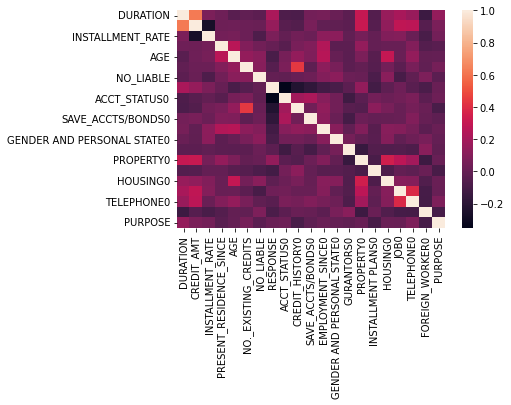

In [699]:
corr_matrix=german_cat.corr()
sns.heatmap(corr_matrix)

In [700]:
german_cat['RESPONSE0']=german_cat['RESPONSE']

In [701]:
german_cat.corr()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,RESPONSE,ACCT_STATUS0,CREDIT_HISTORY0,...,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,RESPONSE0
DURATION,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,-0.072013,-0.077186,...,0.014789,-0.024490,0.303971,-0.054884,0.157049,0.210910,0.164718,-0.138196,0.147492,0.214927
CREDIT_AMT,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,-0.042705,-0.059905,...,-0.016091,-0.027832,0.311599,-0.046008,0.135632,0.285385,0.276995,-0.050050,0.068474,0.154739
INSTALLMENT_RATE,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,-0.005280,0.044375,...,0.119308,-0.011398,0.053391,-0.000983,0.089405,0.097755,0.014413,-0.090024,0.048369,0.072404
PRESENT_RESIDENCE_SINCE,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,-0.042234,0.063198,...,-0.027269,-0.025678,0.147231,0.002089,0.011941,0.012655,0.095359,-0.054097,-0.038221,0.002967
AGE,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,0.059751,0.147086,...,0.007783,-0.029873,0.072606,-0.042346,0.301419,0.015673,0.145259,-0.006151,0.001312,-0.091127
NO._EXISTING_CREDITS,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,0.076005,0.437066,...,0.064672,-0.025447,-0.007765,-0.048442,0.048591,-0.026321,0.065553,-0.009717,0.054935,-0.045732
NO_LIABLE,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,-0.014145,0.011550,...,0.122165,0.020400,0.011872,-0.076891,0.114508,-0.093559,-0.014753,0.077071,-0.032577,-0.003015
RESPONSE,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,-0.350847,-0.228785,...,-0.088184,-0.025137,0.142612,-0.109844,-0.019315,0.032735,-0.036466,-0.082079,0.017979,1.000000
ACCT_STATUS0,-0.072013,-0.042705,-0.005280,-0.042234,0.059751,0.076005,-0.014145,-0.350847,1.000000,0.192191,...,0.043261,-0.127737,-0.032260,0.046841,0.022424,0.040663,0.066296,-0.026758,0.028783,-0.350847
CREDIT_HISTORY0,-0.077186,-0.059905,0.044375,0.063198,0.147086,0.437066,0.011550,-0.228785,0.192191,1.000000,...,0.042171,-0.040676,-0.053777,0.121973,0.062095,0.010350,0.052370,0.013873,-0.090336,-0.228785


In [702]:
corr_cat=german_cat.corr()
corr_df=corr_cat.loc[(corr_cat['RESPONSE0']>0.1) | (corr_cat['RESPONSE0']<-0.1),['RESPONSE0']]

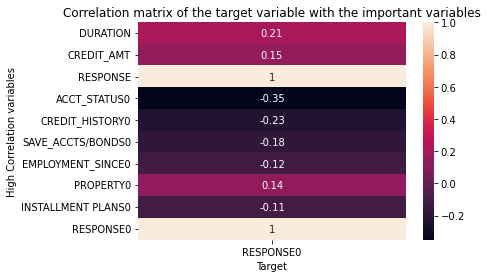

In [703]:
sns.heatmap(corr_df,annot=True)
plot_labels("Target","High Correlation variables","Correlation matrix of the target variable with the important variables")

In [704]:
german_cat.drop('RESPONSE',axis=1,inplace=True)

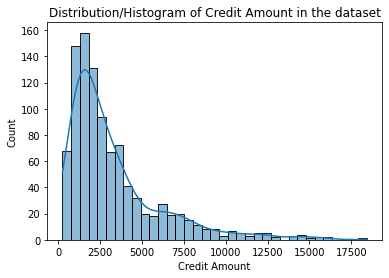

In [705]:
sns.histplot(german_cat['CREDIT_AMT'],kde=True)
plot_labels("Credit Amount","Count","Distribution/Histogram of Credit Amount in the dataset")

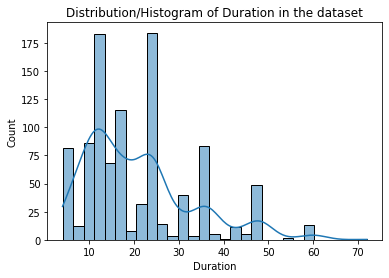

In [706]:
sns.histplot(german_cat['DURATION'],kde=True)
plot_labels("Duration","Count","Distribution/Histogram of Duration in the dataset")

In [707]:
german_cat[['CREDIT_AMT','AGE']].corr()

,CREDIT_AMT,AGE
CREDIT_AMT,1.000000,0.032716
AGE,0.032716,1.000000


In [708]:
german_cat[['CREDIT_AMT','DURATION']].corr()

,CREDIT_AMT,DURATION
CREDIT_AMT,1.000000,0.624984
DURATION,0.624984,1.000000


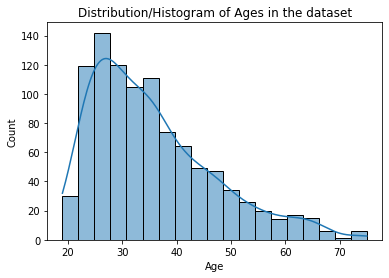

In [709]:
sns.histplot(german_cat['AGE'],kde=True)
plot_labels("Age","Count","Distribution/Histogram of Ages in the dataset")

In [710]:
age_bins=[20,26,45,57,76]
age_labels2=['Generation Z','Millenials','Generation X','Baby Boomers']
age_labels=[1,2,3,4]

In [711]:
age_german_cat=german_cat

In [712]:
age_german_cat['AGE0']=pd.cut(age_german_cat['AGE'],bins=age_bins,labels=age_labels)
age_german_cat['AGE1']=pd.cut(age_german_cat['AGE'],bins=age_bins,labels=age_labels2)
age_german_cat['AGE']

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: AGE, Length: 1000, dtype: int64

In [713]:
#Have to convert variables to categorical

In [714]:
means=[]
for i in range(1,5):
  means.append(age_german_cat[age_german_cat['AGE0']==i]['CREDIT_AMT'].mean())

In [715]:
means

[3054.0848214285716, 3422.0052264808364, 3007.181102362205, 3526.7796610169494]

In [716]:
#age_labels2=['Generation Z','Millenials','Generation X','Baby Boomers']

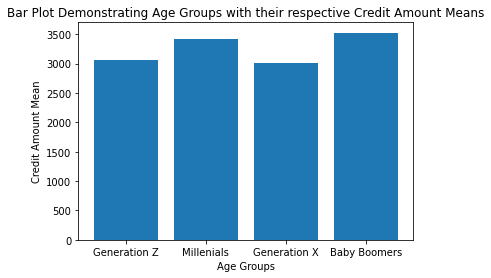

In [717]:
plt.bar(age_labels2,means)
plot_labels("Age Groups","Credit Amount Mean","Bar Plot Demonstrating Age Groups with their respective Credit Amount Means")

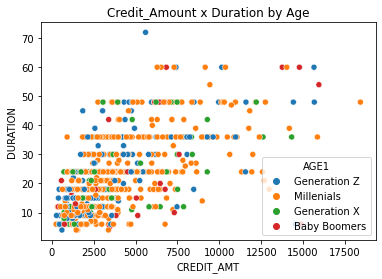

In [718]:
sns.scatterplot(x='CREDIT_AMT',y='DURATION',hue='AGE1',data=age_german_cat)
plt.title("Credit_Amount x Duration by Age")
plt.show()

In [719]:
age_german_cat.columns

Index(['DURATION', 'CREDIT_AMT', 'INSTALLMENT_RATE', 'PRESENT_RESIDENCE_SINCE',
       'AGE', 'NO._EXISTING_CREDITS', 'NO_LIABLE', 'ACCT_STATUS0',
       'CREDIT_HISTORY0', 'SAVE_ACCTS/BONDS0', 'EMPLOYMENT_SINCE0',
       'GENDER AND PERSONAL STATE0', 'GURANTORS0', 'PROPERTY0',
       'INSTALLMENT PLANS0', 'HOUSING0', 'JOB0', 'TELEPHONE0',
       'FOREIGN_WORKER0', 'PURPOSE', 'RESPONSE0', 'AGE0', 'AGE1'],
      dtype='object')

In [720]:
age_german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,...,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,RESPONSE0,AGE0,AGE1
0,6,1169,4,4,67,2,1,1,4,5,...,1,3,2,3,2,1,3,1,4,Baby Boomers
1,48,5951,2,2,22,1,1,2,2,1,...,1,3,2,3,1,1,3,2,1,Generation Z
2,12,2096,2,3,49,1,2,4,4,1,...,1,3,2,2,1,1,6,1,3,Generation X
3,42,7882,2,4,45,1,2,1,2,1,...,2,3,3,3,1,1,2,1,2,Millenials
4,24,4870,3,4,53,2,2,1,3,1,...,4,3,3,3,1,1,0,2,3,Generation X


In [721]:
age_german_cat.describe()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,...,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,RESPONSE0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,2.577000,2.54500,2.105000,...,2.68200,1.145000,2.358000,2.675000,1.929000,2.904000,1.404000,1.037000,2.828000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,1.257638,1.08312,1.580023,...,0.70808,0.477706,1.050209,0.705601,0.531264,0.653614,0.490943,0.188856,2.744439,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,2.00000,1.000000,...,2.00000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000,2.00000,1.000000,...,3.00000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,4.000000,4.00000,3.000000,...,3.00000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,4.000000,4.00000,5.000000,...,4.00000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,10.000000,2.000000


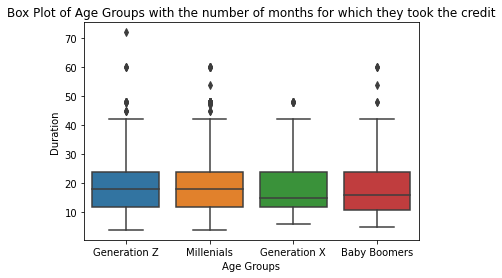

In [722]:
sns.boxplot(x='AGE1',y='DURATION',data=age_german_cat)
plot_labels("Age Groups","Duration","Box Plot of Age Groups with the number of months for which they took the credit")

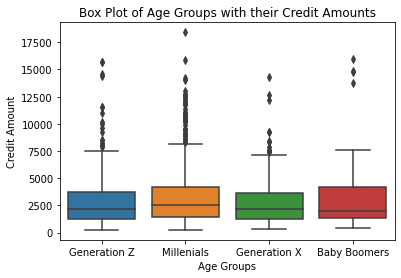

In [723]:
sns.boxplot(x='AGE1',y='CREDIT_AMT',data=age_german_cat)
plot_labels("Age Groups","Credit Amount","Box Plot of Age Groups with their Credit Amounts")

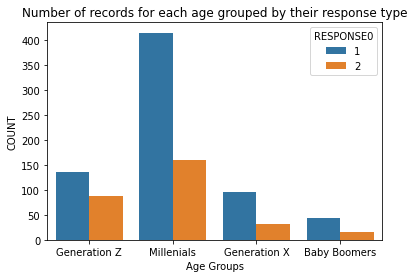

In [728]:
sns.countplot(x='AGE1',hue='RESPONSE0',data=age_german_cat)
plot_labels("Age Groups","COUNT","Number of records for each age grouped by their response type")

In [729]:
age_german_cat.columns

Index(['DURATION', 'CREDIT_AMT', 'INSTALLMENT_RATE', 'PRESENT_RESIDENCE_SINCE',
       'AGE', 'NO._EXISTING_CREDITS', 'NO_LIABLE', 'ACCT_STATUS0',
       'CREDIT_HISTORY0', 'SAVE_ACCTS/BONDS0', 'EMPLOYMENT_SINCE0',
       'GENDER AND PERSONAL STATE0', 'GURANTORS0', 'PROPERTY0',
       'INSTALLMENT PLANS0', 'HOUSING0', 'JOB0', 'TELEPHONE0',
       'FOREIGN_WORKER0', 'PURPOSE', 'RESPONSE0', 'AGE0', 'AGE1'],
      dtype='object')

In [730]:
#Q1 = age_german_cat['CREDIT_AMT'].groupby('AGE1')
#Q3 = age_german_cat['CREDIT_AMT'].groupby('AGE1')
#IQR = Q3 - Q1
#print(Q1,Q3,IQR)

In [731]:
#(age_german_cat[age_german_cat['AGE0']==1]['CREDIT_AMT'] < (Q1 - 1.5 * IQR))

NORMALIZING CREDIT_AMT AND DURATION

In [732]:
normal_german_cat=age_german_cat

In [733]:
normal_german_cat_target=age_german_cat[['RESPONSE0']]

In [734]:
#normal_german_cat.drop('RESPONSE0',axis=1,inplace=True)

In [735]:
normal_german_cat_target=normal_german_cat_target.replace(2,0)

In [736]:
normal_german_cat_target['RESPONSE0'].value_counts()

1    700
0    300
Name: RESPONSE0, dtype: int64

In [737]:
normal_german_cat.drop(['RESPONSE0','AGE1'],axis=1,inplace=True)

In [738]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
cols=normal_german_cat.columns
normal_german_cat = scaler.fit_transform(normal_german_cat)
scaled_normal_german_cat = pd.DataFrame(normal_german_cat, columns=cols)
scaled_normal_german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,...,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,AGE0
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.000000,1.00,1.0,...,0.666667,0.0,0.000000,1.0,0.5,0.666667,1.0,0.0,0.3,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.333333,0.50,0.0,...,0.333333,0.0,0.000000,1.0,0.5,0.666667,0.0,0.0,0.3,1.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,1.00,0.0,...,0.666667,0.0,0.000000,1.0,0.5,0.333333,0.0,0.0,0.6,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.000000,0.50,0.0,...,0.666667,1.0,0.333333,1.0,1.0,0.666667,0.0,0.0,0.2,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.000000,0.75,0.0,...,0.666667,0.0,1.000000,1.0,1.0,0.666667,0.0,0.0,0.0,1.0


In [739]:
normal_german_cat = pd.DataFrame(normal_german_cat, columns=cols)
normal_german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,AGE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,...,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,AGE0
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.000000,1.00,1.0,...,0.666667,0.0,0.000000,1.0,0.5,0.666667,1.0,0.0,0.3,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.333333,0.50,0.0,...,0.333333,0.0,0.000000,1.0,0.5,0.666667,0.0,0.0,0.3,1.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,1.00,0.0,...,0.666667,0.0,0.000000,1.0,0.5,0.333333,0.0,0.0,0.6,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.000000,0.50,0.0,...,0.666667,1.0,0.333333,1.0,1.0,0.666667,0.0,0.0,0.2,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.000000,0.75,0.0,...,0.666667,0.0,1.000000,1.0,1.0,0.666667,0.0,0.0,0.0,1.0


In [740]:
scaled_normal_german_cat.drop('AGE',axis=1,inplace=True)

In [741]:
scaled_normal_german_cat.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,EMPLOYMENT_SINCE0,GENDER AND PERSONAL STATE0,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,AGE0
0,0.029412,0.050567,1.000000,1.000000,0.333333,0.0,0.000000,1.00,1.0,1.00,0.666667,0.0,0.000000,1.0,0.5,0.666667,1.0,0.0,0.3,1.0
1,0.647059,0.313690,0.333333,0.333333,0.000000,0.0,0.333333,0.50,0.0,0.50,0.333333,0.0,0.000000,1.0,0.5,0.666667,0.0,0.0,0.3,1.0
2,0.117647,0.101574,0.333333,0.666667,0.000000,1.0,1.000000,1.00,0.0,0.75,0.666667,0.0,0.000000,1.0,0.5,0.333333,0.0,0.0,0.6,1.0
3,0.558824,0.419941,0.333333,1.000000,0.000000,1.0,0.000000,0.50,0.0,0.75,0.666667,1.0,0.333333,1.0,1.0,0.666667,0.0,0.0,0.2,1.0
4,0.294118,0.254209,0.666667,1.000000,0.333333,1.0,0.000000,0.75,0.0,0.50,0.666667,0.0,1.000000,1.0,1.0,0.666667,0.0,0.0,0.0,1.0


In [742]:
result=pd.concat([scaled_normal_german_cat,normal_german_cat_target],axis=1,join='inner')
result.head()

,DURATION,CREDIT_AMT,INSTALLMENT_RATE,PRESENT_RESIDENCE_SINCE,NO._EXISTING_CREDITS,NO_LIABLE,ACCT_STATUS0,CREDIT_HISTORY0,SAVE_ACCTS/BONDS0,EMPLOYMENT_SINCE0,...,GURANTORS0,PROPERTY0,INSTALLMENT PLANS0,HOUSING0,JOB0,TELEPHONE0,FOREIGN_WORKER0,PURPOSE,AGE0,RESPONSE0
0,0.029412,0.050567,1.000000,1.000000,0.333333,0.0,0.000000,1.00,1.0,1.00,...,0.0,0.000000,1.0,0.5,0.666667,1.0,0.0,0.3,1.0,1
1,0.647059,0.313690,0.333333,0.333333,0.000000,0.0,0.333333,0.50,0.0,0.50,...,0.0,0.000000,1.0,0.5,0.666667,0.0,0.0,0.3,1.0,0
2,0.117647,0.101574,0.333333,0.666667,0.000000,1.0,1.000000,1.00,0.0,0.75,...,0.0,0.000000,1.0,0.5,0.333333,0.0,0.0,0.6,1.0,1
3,0.558824,0.419941,0.333333,1.000000,0.000000,1.0,0.000000,0.50,0.0,0.75,...,1.0,0.333333,1.0,1.0,0.666667,0.0,0.0,0.2,1.0,1
4,0.294118,0.254209,0.666667,1.000000,0.333333,1.0,0.000000,0.75,0.0,0.50,...,0.0,1.000000,1.0,1.0,0.666667,0.0,0.0,0.0,1.0,0


In [743]:
corr_df.index

Index(['DURATION', 'CREDIT_AMT', 'RESPONSE', 'ACCT_STATUS0', 'CREDIT_HISTORY0',
       'SAVE_ACCTS/BONDS0', 'EMPLOYMENT_SINCE0', 'PROPERTY0',
       'INSTALLMENT PLANS0', 'RESPONSE0'],
      dtype='object')

In [744]:
red_cols=list(corr_df.index)
red_cols.remove('RESPONSE')
red_cols.remove('RESPONSE0')
red_cols

['DURATION',
 'CREDIT_AMT',
 'ACCT_STATUS0',
 'CREDIT_HISTORY0',
 'SAVE_ACCTS/BONDS0',
 'EMPLOYMENT_SINCE0',
 'PROPERTY0',
 'INSTALLMENT PLANS0']

In [745]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_normal_german_cat[red_cols], normal_german_cat_target['RESPONSE0'], test_size=0.4,random_state=42)

In [746]:
y_train.value_counts(normalize=True)

1    0.696667
0    0.303333
Name: RESPONSE0, dtype: float64

In [747]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
logRegressor = LogisticRegression()

In [821]:
logRegressor.fit(x_train, y_train)

LogisticRegression()

In [822]:
predictions = logRegressor.predict(x_test)

In [823]:
metric_show(y_test,predictions,"Logistic Regression")

Accuracy on Logistic Regression: 0.765
Precision on Logistic Regression: 0.7781065088757396
Recall on Logistic Regression: 0.9326241134751773
[[ 43  75]
 [ 19 263]]
Loss on Regression:  17000


In [824]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.36      0.48       118
           1       0.78      0.93      0.85       282

    accuracy                           0.77       400
   macro avg       0.74      0.65      0.66       400
weighted avg       0.75      0.77      0.74       400



In [751]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [752]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [753]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [754]:
predictions=classifier.predict(x_test)

In [755]:
metric_show(y_test,predictions,"Decision Tree")

Accuracy on Decision Tree: 0.7475
Precision on Decision Tree: 0.7767584097859327
Recall on Decision Tree: 0.900709219858156
[[ 45  73]
 [ 28 254]]
Loss on Regression:  21300


In [756]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [757]:
lda=LinearDiscriminantAnalysis()

In [758]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [759]:
predictions=lda.predict(x_test)

In [760]:
metric_show(y_test,predictions,"Discriminant Analysis")

Accuracy on Discriminant Analysis: 0.765
Precision on Discriminant Analysis: 0.7831325301204819
Recall on Discriminant Analysis: 0.9219858156028369
[[ 46  72]
 [ 22 260]]
Loss on Regression:  18200


In [761]:
from sklearn.neural_network import MLPClassifier

In [808]:
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3))

In [809]:
mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(3, 3, 3))

In [810]:
predictions=mlp.predict(x_test)
metric_show(y_test,predictions,"Neural Network")


Accuracy on Neural Network: 0.7175
Precision on Neural Network: 0.7253333333333334
Recall on Neural Network: 0.9645390070921985
[[ 15 103]
 [ 10 272]]
Loss on Regression:  15300


In [820]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.13      0.21       118
           1       0.73      0.96      0.83       282

    accuracy                           0.72       400
   macro avg       0.66      0.55      0.52       400
weighted avg       0.69      0.72      0.65       400

